In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.metrics import confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout


In [5]:
dataset = pd.read_csv('/Users/prajwal/Developer/Prep/Deep_Learning/Churn_Modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
geography = pd.get_dummies(X['Geography'], drop_first= True)

In [10]:
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [11]:
X = X.drop(['Gender', 'Geography'], axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
X = pd.concat([X,gender,geography], axis=1)

In [14]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 11)
y shape: (10000,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
#Creating ANN

classifier = Sequential()

In [21]:
#adding input layer

classifier.add(Dense(units = 11, activation = 'relu'))

In [22]:
#adding hidden layer

classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.3))

In [23]:
# adding 2nd hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))

In [24]:
# adding output layer

classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [25]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000)

Epoch 1/1000


536/536 [==============================] - 2s 2ms/step - loss: 0.5604 - accuracy: 0.7533 - val_loss: 0.4856 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4818 - accuracy: 0.7962 - val_loss: 0.4610 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4653 - accuracy: 0.7962 - val_loss: 0.4448 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 0s 857us/step - loss: 0.4502 - accuracy: 0.7962 - val_loss: 0.4338 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4381 - accuracy: 0.7962 - val_loss: 0.4266 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.7962 - val_loss: 0.4190 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 1s 979us/step - loss: 0.4185 - accuracy: 0.8009 - val_loss: 0.4044 - val_accuracy: 0.8073
E

In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
# early stopping

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [29]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/1000
536/536 [==============================] - 1s 965us/step - loss: 0.3194 - accuracy: 0.8709 - val_loss: 0.3944 - val_accuracy: 0.8455
Epoch 2/1000
536/536 [==============================] - 0s 866us/step - loss: 0.3138 - accuracy: 0.8733 - val_loss: 0.3990 - val_accuracy: 0.8550
Epoch 3/1000
536/536 [==============================] - 1s 935us/step - loss: 0.3140 - accuracy: 0.8722 - val_loss: 0.3941 - val_accuracy: 0.8542
Epoch 4/1000
536/536 [==============================] - 0s 840us/step - loss: 0.3153 - accuracy: 0.8712 - val_loss: 0.3951 - val_accuracy: 0.8527
Epoch 5/1000
536/536 [==============================] - 0s 831us/step - loss: 0.3203 - accuracy: 0.8690 - val_loss: 0.3930 - val_accuracy: 0.8546
Epoch 6/1000
536/536 [==============================] - 0s 833us/step - loss: 0.3133 - accuracy: 0.8735 - val_loss: 0.4042 - val_accuracy: 0.8501
Epoch 7/1000
536/536 [==============================] - 0s 851us/step - loss: 0.3171 - accuracy: 0.8726 - val_loss: 0.3833 -

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

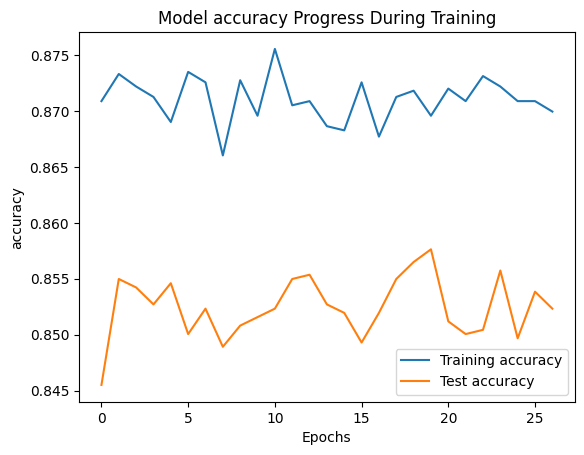

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()

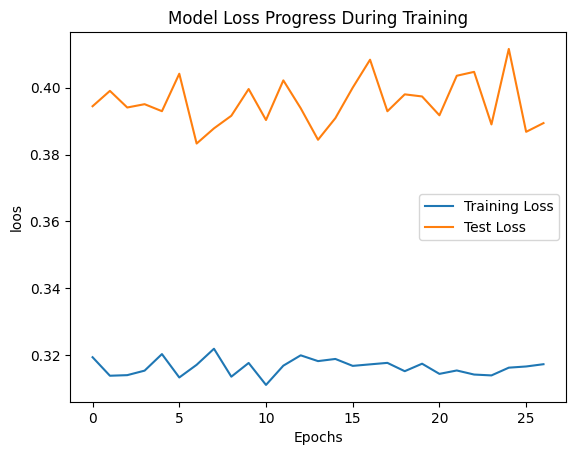

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('loos')
plt.legend(['Training Loss', 'Test Loss'])
plt.show()

In [33]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 452us/step


In [34]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[1496,   99],
       [ 186,  219]])

In [36]:
score = accuracy_score(y_pred, y_test)
score

0.8575

In [37]:
#get weights

classifier.get_weights()

[array([[-0.18531291,  0.04140345, -0.31616968, -0.3422247 , -0.6567623 ,
          0.05542108, -1.1246021 , -0.19684523, -0.24293809, -0.13030826,
          0.1267576 ],
        [-0.06838427, -1.737453  ,  0.18632881, -0.64903426,  1.27189   ,
         -0.07808767,  1.0067339 ,  0.10813721, -0.26598492,  0.10344695,
         -0.92355996],
        [ 0.08451216,  0.16932023, -0.12141941,  0.28126204,  0.45016828,
         -0.35431546, -0.2999213 , -0.07047788,  0.3529831 ,  0.3089076 ,
         -0.05787969],
        [ 1.3853232 ,  0.06368805,  0.76730037,  0.5337437 ,  0.19422421,
         -0.63413996, -0.0544784 ,  0.47550657, -0.81944877, -0.10363143,
         -0.07920936],
        [ 1.5155008 , -0.02017802, -0.60287535,  1.2111979 ,  0.55538493,
          0.20197693, -0.8727303 ,  2.2408373 , -1.7241957 , -1.6223221 ,
         -1.4215317 ],
        [-0.11020461,  0.11068049,  0.5968748 , -0.15553592,  0.30069983,
         -0.69479924,  0.02098608, -0.087635  ,  0.03316033,  0.0988658

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)